## Importing and Cleaning the Data

Each row in the data matrix is a time series measured from 64 channels (64 different neurons)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Since we will use a matlab file, this module is necessary
from scipy.io import loadmat

In [2]:
import os
os.chdir("/Users/sheraji/OnlineCourses/PythonforScience/MasterPython_CodeAndData/stateSpaceTrajectories")
os.getcwd()

'/Users/sheraji/OnlineCourses/PythonforScience/MasterPython_CodeAndData/stateSpaceTrajectories'

In [3]:
matdat = loadmat("ALMdata.mat")
matdat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jul 21 07:38:12 2020',
 '__version__': '1.0',
 '__globals__': [],
 'Channel_all': array([[ 1],
        [11],
        [14],
        ...,
        [13],
        [13],
        [14]], dtype=uint8),
 'PSTH_nonprefer_cue_aligned': array([[ 0.11764706,  0.11764706,  0.11764706, ...,  3.76470588,
          3.64705882,  3.76470588],
        [ 0.0862069 ,  0.0862069 ,  0.0862069 , ...,  0.0862069 ,
          0.0862069 ,  0.0862069 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.4       ,
          0.4       ,  0.4       ],
        ...,
        [ 1.53846154,  1.53846154,  1.53846154, ...,  2.15384615,
          2.15384615,  2.15384615],
        [11.16438356, 11.30136986, 11.36986301, ..., 18.42465753,
         18.42465753, 18.49315068],
        [ 3.45238095,  3.51190476,  3.51190476, ...,  2.38095238,
          2.5       ,  2.55952381]]),
 'PSTH_prefer_cue_aligned': array([[ 0.        ,  0.        ,  0.        , ..

In [4]:
matdat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Channel_all', 'PSTH_nonprefer_cue_aligned', 'PSTH_prefer_cue_aligned', 't'])

In [5]:
# Non-preferred data matrix
Nopr = matdat['PSTH_nonprefer_cue_aligned']
Nopr.shape

(1186, 5101)

In [6]:
# Preferred Data Matrix
Pref = matdat['PSTH_prefer_cue_aligned']
Pref.shape

(1186, 5101)

In [7]:
# Time Vector
t = matdat["t"][0]
t.shape

(5101,)

In [8]:
# Which row correspond to which channel/neuron
chanidx = matdat["Channel_all"]
chanidx.shape

(1186, 1)

In [9]:
print(Nopr.shape), print(" ")
print(Pref.shape), print(" ")
print(t.shape), print(" ")
chanidx = chanidx.flatten() # Flatten it and convert to array
print(chanidx.shape)

(1186, 5101)
 
(1186, 5101)
 
(5101,)
 
(1186,)


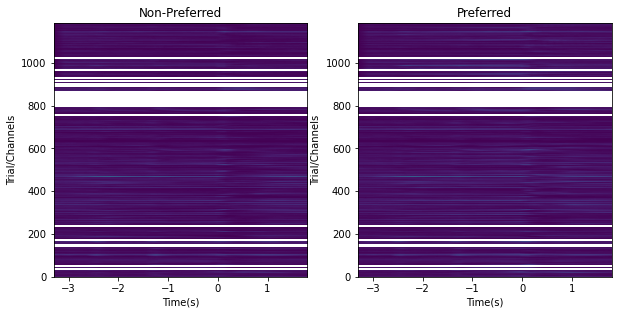

In [10]:
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].imshow(Nopr, extent = [t[0],t[-1], 0, Nopr.shape[0]], origin = "upper")
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel("Time(s)")
ax[0].set_ylabel("Trial/Channels")
ax[0].set_title("Non-Preferred")
ax[1].imshow(Pref, extent = [t[0],t[-1], 0, Pref.shape[0]], origin = "upper")
ax[1].set_aspect(1/ax[1].get_data_ratio())
ax[1].set_xlabel("Time(s)")
ax[1].set_ylabel("Trial/Channels")
ax[1].set_title("Preferred")
plt.show()

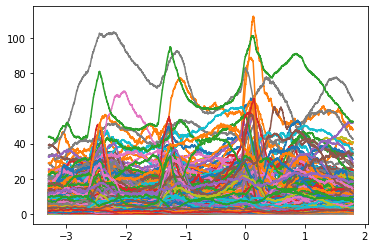

In [11]:
# Lineplots for all measurements
plt.plot(t, Nopr.T)
plt.show()

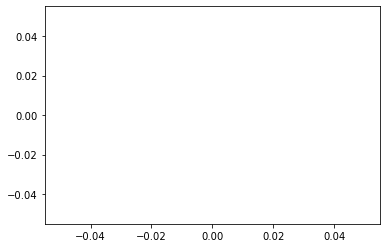

[nan nan nan ... nan nan nan]


In [12]:
# Lineplot for a single measurements in white region
plt.plot(t, Nopr[380,:])
plt.show()
print(Nopr[380,:])

In [13]:
# Clean NANs from the matrix
np.isfinite(np.nan)

False

In [14]:
np.isfinite(5)

True

In [15]:
# Remove rows with NaNs
print(Nopr.shape)
Nopr = Nopr[np.isfinite(Nopr[:,0]),:]
print(Nopr.shape)

(1186, 5101)
(1111, 5101)


In [16]:
array_has_nan = np.isnan(Nopr)
print(np.sum(array_has_nan))

0


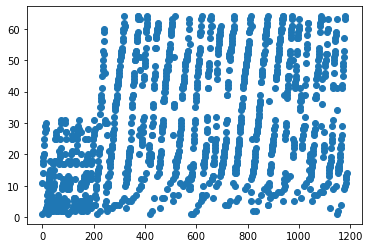

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64], dtype=uint8)

In [17]:
# Removing NaNs form channel
plt.plot(chanidx, "o")
plt.show()
np.unique(chanidx)

In [18]:
# Do the same using set
#set(chanidx)
len(np.unique(chanidx))

64

In [19]:
print(chanidx.shape)
chanidx = chanidx[np.isfinite(Pref[:,0])]
print(chanidx.shape)

(1186,)
(1111,)


In [20]:
print(Pref.shape)
Pref = Pref[np.isfinite(Pref[:,0]),:]
print(Pref.shape)

(1186, 5101)
(1111, 5101)


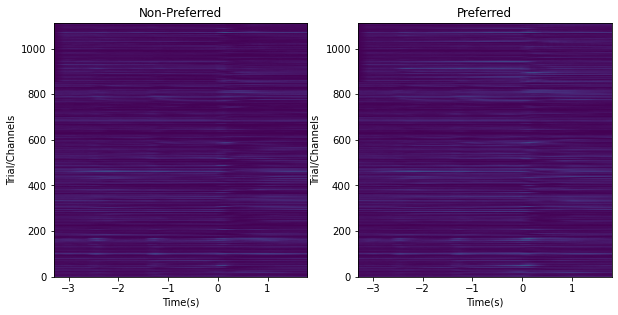

In [21]:
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].imshow(Nopr, extent = [t[0],t[-1], 0, Nopr.shape[0]], origin = "upper")
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel("Time(s)")
ax[0].set_ylabel("Trial/Channels")
ax[0].set_title("Non-Preferred")
ax[1].imshow(Pref, extent = [t[0],t[-1], 0, Pref.shape[0]], origin = "upper")
ax[1].set_aspect(1/ax[1].get_data_ratio())
ax[1].set_xlabel("Time(s)")
ax[1].set_ylabel("Trial/Channels")
ax[1].set_title("Preferred")
plt.show()

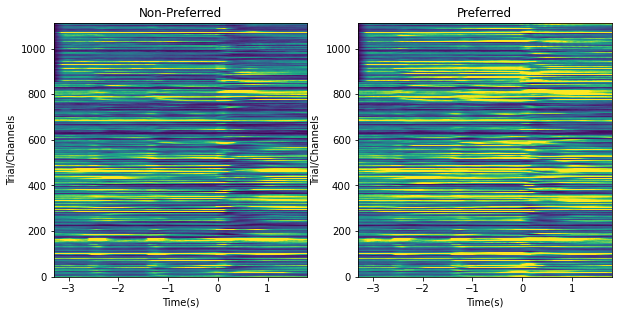

In [22]:
# Clean Figures and use color scaling
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].imshow(Nopr, extent = [t[0],t[-1], 0, Nopr.shape[0]], origin = "upper",
            vmin=0, vmax=10)
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel("Time(s)")
ax[0].set_ylabel("Trial/Channels")
ax[0].set_title("Non-Preferred")
ax[1].imshow(Pref, extent = [t[0],t[-1], 0, Pref.shape[0]], origin = "upper",
            vmin=0, vmax=10)
ax[1].set_aspect(1/ax[1].get_data_ratio())
ax[1].set_xlabel("Time(s)")
ax[1].set_ylabel("Trial/Channels")
ax[1].set_title("Preferred")
plt.show()

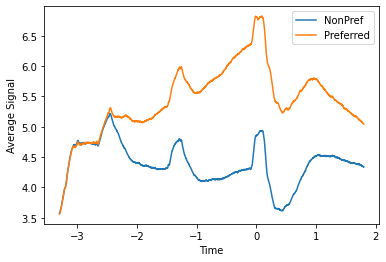

In [23]:
# Plot of the marginal average
plt.plot(t, np.mean(Nopr, axis = 0), label = "NonPref")
plt.plot(t, np.mean(Pref, axis = 0), label = "Preferred")
plt.xlabel("Time")
plt.ylabel("Average Signal")
plt.legend()
plt.show()

## Create a Channel Covariance Matrix

In [24]:
# Compute two new data matrices
nchans = np.max(chanidx)
chanaveNopr = np.zeros((nchans, len(t)))
chanavePref = np.zeros((nchans, len(t)))

for i in range(1, nchans + 1):
    chanaveNopr[i-1,:] = np.mean(Nopr[chanidx == i,:], axis = 0)
    chanavePref[i-1,:] = np.mean(Pref[chanidx == i,:], axis = 0)

print(chanavePref.shape)
print(chanaveNopr.shape)

(64, 5101)
(64, 5101)


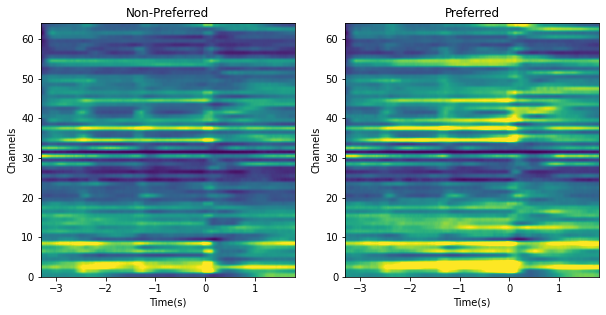

In [25]:
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].imshow(chanaveNopr, extent = [t[0],t[-1], 0, chanaveNopr.shape[0]], origin = "upper",
            vmin=0, vmax=10)
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel("Time(s)")
ax[0].set_ylabel("Channels")
ax[0].set_title("Non-Preferred")
ax[1].imshow(chanavePref, extent = [t[0],t[-1], 0, chanavePref.shape[0]], origin = "upper",
            vmin=0, vmax=10)
ax[1].set_aspect(1/ax[1].get_data_ratio())
ax[1].set_xlabel("Time(s)")
ax[1].set_ylabel("Channels")
ax[1].set_title("Preferred")
plt.show()

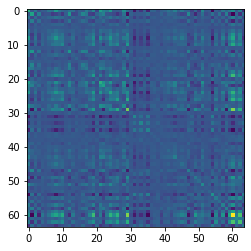

In [26]:
# Compute covariance matrices
# Step by step it is as follows:
# 1 - Mean-Center the data
# 2 - Compute A@A.T
# In python we can use np.cov() and it takes cae of everything
covmatpref = np.cov(chanavePref)
covmatpref.shape
plt.imshow(covmatpref)
plt.show()

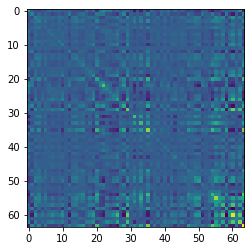

In [27]:
covmatnopr = np.cov(chanaveNopr)
covmatnopr.shape
plt.imshow(covmatnopr);

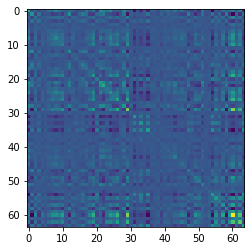

In [28]:
# Join both matrices
covmat = (covmatpref + covmatnopr)/2
plt.imshow(covmat);

## Run PCA and Compute the Components

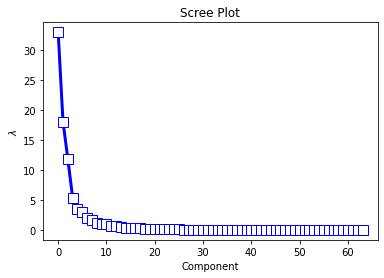

In [29]:
# eigan decomposition
# for symmetric matrix:
# we can use eig() as well, but eigh is more stable
evals, evecs = np.linalg.eigh(covmat)

sidx = np.argsort(evals)[::-1] # vector of indeces
evals = evals[sidx] # sort them in descending order
evecs = evecs[:, sidx] # soert eigenvectors as well
plt.plot(evals, "bs-", markerfacecolor = "w", markersize = 10, linewidth = 3)
plt.xlabel("Component")
plt.ylabel("$\lambda$")
plt.title("Scree Plot")
plt.show()

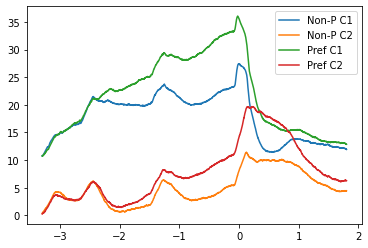

In [30]:
# Eigan vectors have random signs
for i in range(2):
    maxi = np.argmax(abs(evecs[:,i]))
    evecs[:,i] *= np.sign(evecs[maxi,i])
pcNopr = evecs[:, 0:2].T @ chanaveNopr
pcPref = evecs[:, 0:2].T @ chanavePref

plt.plot(t, pcNopr.T ,t, pcPref.T)
plt.legend(["Non-P C1", "Non-P C2", "Pref C1", "Pref C2"])
plt.show()

## State Space Trajectories

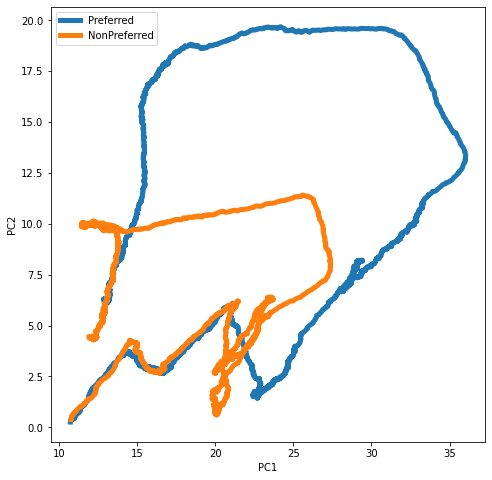

In [31]:
# Collapse the kines above into trajectories.
plt.figure(figsize = (8,8))
plt.plot(pcPref[0,:], pcPref[1,:], label = "Preferred", linewidth = 5)
plt.plot(pcNopr[0,:], pcNopr[1,:], label = "NonPreferred", linewidth = 5)
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.show()

## Draw Time Using Hues

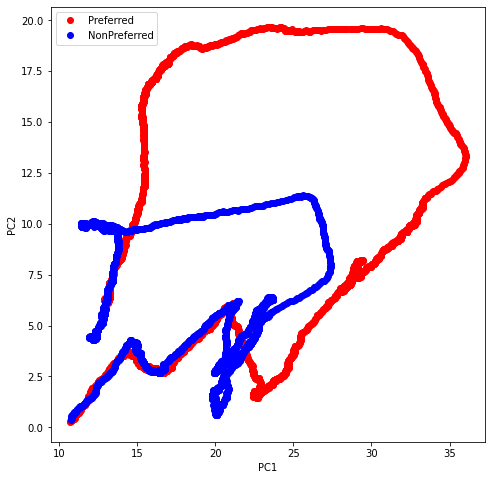

In [32]:
plt.figure(figsize = (8,8))
plt.plot(pcPref[0,:], pcPref[1,:], "ro", label = "Preferred")
plt.plot(pcNopr[0,:], pcNopr[1,:], "bo", label = "NonPreferred")
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.show()

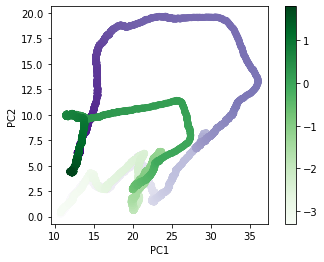

In [33]:
# Show the time direction using color hues
plt.scatter(pcPref[0,:], pcPref[1,:], cmap = "Purples", c = t)
plt.scatter(pcNopr[0,:], pcNopr[1,:], cmap = "Greens", c = t)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.show()

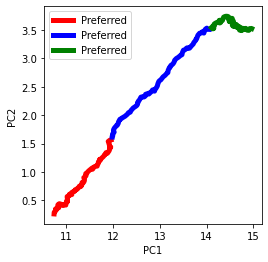

In [34]:
# Make the plot into pieces
plt.plot(pcPref[0,0:100], pcPref[1,0:100], color = "r", label = "Preferred", linewidth = 5)
plt.plot(pcPref[0,101:200], pcPref[1,101:200], color = "b", label = "Preferred", linewidth = 5)
plt.plot(pcPref[0,201:300], pcPref[1,201:300], color = "g", label = "Preferred", linewidth = 5)
#plt.plot(pcNopr[0,:], pcNopr[1,:], label = "NonPreferred", linewidth = 5)
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.show()

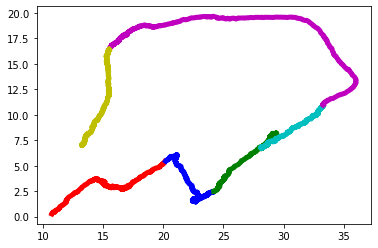

In [35]:
# Use a for-loop
colors = ["r", "b", "g", "c", "m", "y"]
for i in range(0,6):
    plt.plot(pcPref[0,i*800:(i+1)*800], pcPref[1,i*800:(i+1)*800], color = colors[i], linewidth = 5)
plt.show()